In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import numpy as np

In [2]:
filename = '../data/MyD88/24hpi_5_24hpi exp1 myd88 low.csv'
dataframe = pd.read_csv(filename,header=1)

In [3]:
# preview the structure of the data
dataframe[:5]

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,TrackID,ID
0,144.15,257.67,19.99,um,Surface,Position,1,1000000000,0
1,142.51,271.02,19.07,um,Surface,Position,2,1000000000,8
2,141.46,286.30,19.85,um,Surface,Position,3,1000000000,20
3,147.74,282.86,19.47,um,Surface,Position,4,1000000000,30
4,139.47,268.20,19.41,um,Surface,Position,5,1000000000,37


In [4]:
# extract the track IDs
trackIDs = np.unique(dataframe['TrackID'])
num_tracks = len(trackIDs)
num_timepoints = len(np.unique(dataframe['Time'].values))
num_tracks, num_timepoints

(12, 60)

In [5]:
reshapeddata = pd.DataFrame({'trackID':dataframe['TrackID'],
                             'time':dataframe['Time'],
                             'x':dataframe['Position X'],
                             'y':dataframe['Position Y'],
                             'z':dataframe['Position Z']})

In [6]:
reshapeddata

,trackID,time,x,y,z
0,1000000000,1,144.15,257.67,19.99
1,1000000000,2,142.51,271.02,19.07
2,1000000000,3,141.46,286.30,19.85
3,1000000000,4,147.74,282.86,19.47
4,1000000000,5,139.47,268.20,19.41
5,1000000000,6,148.25,265.13,18.92
6,1000000000,7,156.00,274.90,19.10
7,1000000000,8,165.41,282.37,21.49
8,1000000000,9,174.04,275.85,21.82
9,1000000000,10,174.04,273.53,21.41


In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [8]:
from inference.walker_inference import BiasedPersistentInferer, prepare_paths

In [9]:
from in_silico.sources import PointSource

(-17.330000000000002,
 430.59000000000003,
 89.88399999999999,
 301.87600000000003)

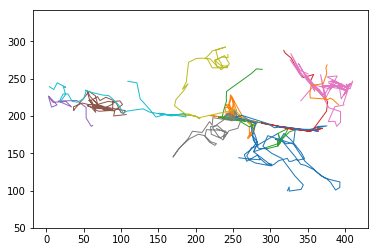

In [10]:
fig1 = plt.figure()
for ID, tracks in reshapeddata.groupby('trackID'):
        plt.plot(tracks['y'], tracks['x'], lw=1)
plt.axis('equal')

In [11]:
fig1.savefig('tracks_myd88low.pdf')

In [12]:
inf = BiasedPersistentInferer(prepare_paths([paths[['x', 'y']].values for id, paths in reshapeddata.groupby('trackID')], include_t=False), PointSource((300, 300)))


In [13]:
out = inf.multi_infer(n_walkers=20, n_steps=20000, burn_in=10000)

Beginning MCMC walk in parallel


Total acceptance Rate: 0.310. Rolling acceptance rate: 0.250:   4%|▍         | 1244/30000 [00:00<00:15, 1820.76it/s]

Total acceptance Rate: 0.283. Rolling acceptance rate: 0.220:  35%|███▍      | 10450/30000 [00:06<00:11, 1662.50it/s]

Total acceptance Rate: 0.229. Rolling acceptance rate: 0.280:  97%|█████████▋| 29016/30000 [00:16<00:00, 1624.65it/s]
Total acceptance Rate: 0.230. Rolling acceptance rate: 0.220:  98%|█████████▊| 29455/30000 [00:16<00:00, 1736.32it/s]
Total acceptance Rate: 0.230. Rolling acceptance rate: 0.220:  99%|█████████▉| 29660/30000 [00:16<00:00, 1818.37it/s]
Total acceptance Rate: 0.226. Rolling acceptance rate: 0.200:  98%|█████████▊| 29501/30000 [00:16<00:00, 1861.13it/s]
Total acceptance Rate: 0.230. Rolling acceptance rate: 0.290:  99%|█████████▉| 29660/30000 [00:16<00:00, 1818.37it/s]
Total acceptance Rate: 0.226. Rolling acceptance rate: 0.210:  98%|█████████▊| 29501/30000 [00:16<00:00, 1861.13it/s]
Total acceptance Rate: 0.233. Rolling acceptance rate: 0.330: 100%|██████████| 30000/30000 [00:16<00:00, 1771.65it/s]
Total acceptance Rate: 0.228. Rolling acceptance rate: 0.185: 100%|██████████| 30000/30000 [00:17<00:00, 1761.36it/s]
Total acceptance Rate: 0.230. Rolling acceptance rate: 0

Completed MCMC walk in 17.56s


In [14]:
from utils.plotting import plot_wpb_dist

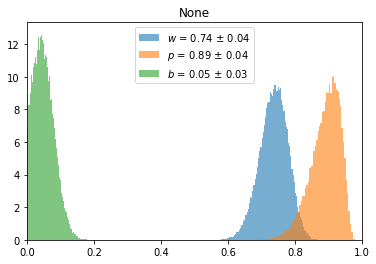

In [15]:
plot_wpb_dist(out,save_as="postis_myd88low.pdf")